## Script de Preparação para os dados que serão utilizados em predições

#### Extração a partir dos 30 veículos, dentre os 99 com 6+ repetições, que possuem mais viagens associadas

### Fase 1: Extração e filtragem

In [ ]:
import pandas as pd

df = pd.read_csv('last_list.csv')

df['VehId'] = df['values']

df

,Unnamed: 0,values,VehId
0,0,12,12
1,1,128,128
2,2,133,133
3,3,135,135
4,4,140,140
...,...,...,...
94,94,591,591
95,95,592,592
96,96,595,595
97,97,597,597


In [ ]:
import pandas as pd
import glob
import time
import os

def contar_trips_arquivo(arquivo, veiculos_alvo):
    """Conta trips únicas por veículo em um arquivo CSV"""
    try:
        # Ler o arquivo CSV
        df = pd.read_csv(arquivo, sep=",")

        # Verificar se as colunas necessárias existem
        if 'VehId' not in df.columns or 'Trip' not in df.columns:
            # Se não tiver as colunas necessárias, retorna vazio
            return {}

        # Filtrar apenas para os veículos de interesse
        df_filtrado = df[df['VehId'].isin(veiculos_alvo)]

        # Se não houver dados para os veículos de interesse, retorna vazio
        if df_filtrado.empty:
            return {}

        # Contar trips únicas por veículo
        trips_por_veiculo = {}
        for veh_id in df_filtrado['VehId'].unique():
            trips_unicas = df_filtrado[df_filtrado['VehId'] == veh_id]['Trip'].nunique()
            trips_por_veiculo[veh_id] = trips_unicas

        return trips_por_veiculo

    except Exception as e:
        print(f"Erro ao processar arquivo {os.path.basename(arquivo)}: {e}")
        return {}

def extrair_dados_veiculo(arquivo, veiculos_selecionados):
    """Extrai dados de um arquivo CSV apenas para os veículos selecionados"""
    try:
        df = pd.read_csv(arquivo, sep=",")

        # Verificar se a coluna VehId existe
        if 'VehId' not in df.columns:
            return pd.DataFrame()

        # Filtrar para os veículos selecionados
        df_filtrado = df[df['VehId'].isin(veiculos_selecionados)]
        return df_filtrado

    except Exception as e:
        print(f"Erro ao extrair dados do arquivo {os.path.basename(arquivo)}: {e}")
        return pd.DataFrame()

# Pegar a lista de veículos da variável df existente (que contém apenas os IDs)
veiculos_alvo = df['VehId'].tolist()
print(f"Analisando {len(veiculos_alvo)} veículos...")

# Caminhos dos arquivos CSV
files = glob.glob(r"C:\Users\firmi\OneDrive\Documentos\ved_descompactados\*.csv")
print(f"Total de {len(files)} arquivos CSV para processar")

# PASSO 1: Contar trips únicas por veículo nos arquivos CSV
print("Contando trips únicas por veículo nos arquivos CSV...")
inicio = time.time()

# Processamento sequencial (sem multiprocessing)
todas_trips_por_veiculo = {}
for i, arquivo in enumerate(files):
    if i % 10 == 0:
        print(f"Processando arquivo {i+1}/{len(files)}...")

    resultado = contar_trips_arquivo(arquivo, veiculos_alvo)

    # Combinar os resultados
    for veh_id, num_trips in resultado.items():
        if veh_id in todas_trips_por_veiculo:
            todas_trips_por_veiculo[veh_id] += num_trips
        else:
            todas_trips_por_veiculo[veh_id] = num_trips

# Converter para Series e ordenar
trips_por_veiculo = pd.Series(todas_trips_por_veiculo).sort_values(ascending=False)

# Tempo para contagem
fim_contagem = time.time()
tempo_contagem = fim_contagem - inicio
print(f"Contagem concluída em {tempo_contagem:.2f} segundos")

# PASSO 2: Selecionar os 99 veículos com mais trips únicas
n = 99
top_veiculos = trips_por_veiculo.head(n).index.tolist()

print(f"\nTop {n} veículos com mais trips únicas:")
for veiculo, num_trips in trips_por_veiculo.head(n).items():
    print(f"Veículo {veiculo}: {num_trips} trips únicas")

# PASSO 3: Extrair dados completos desses 30 veículos dos arquivos originais
print(f"\nExtraindo todos os dados dos {n} veículos selecionados...")
inicio_extracao = time.time()

# Processamento sequencial para extração
df_completo = pd.DataFrame()
for i, arquivo in enumerate(files):
    if i % 10 == 0:
        print(f"Extraindo dados do arquivo {i+1}/{len(files)}...")

    df_arquivo = extrair_dados_veiculo(arquivo, top_veiculos)

    if not df_arquivo.empty:
        df_completo = pd.concat([df_completo, df_arquivo], ignore_index=False)

# Tempo para extração
fim_extracao = time.time()
tempo_extracao = fim_extracao - inicio_extracao
tempo_total = fim_extracao - inicio

print(f"Extração concluída em {tempo_extracao:.2f} segundos")
print(f"Tempo total de processamento: {tempo_total:.2f} segundos")
print(f"Dimensões do DataFrame final: {df_completo.shape}")

# Salvar os dados completos dos 30 veículos
df_completo.to_csv('dados_top99_veiculos.csv', index=False)
print("Dados completos dos 99 veículos salvos em 'dados_top99_veiculos.csv'")

# Atualizar a variável t para conter apenas os IDs dos 99 veículos selecionados
t = top_veiculos
print("Variável 't' atualizada para conter apenas os 99 veículos com mais trips únicas")

Analisando 99 veículos...
Total de 54 arquivos CSV para processar
Contando trips únicas por veículo nos arquivos CSV...
Processando arquivo 1/54...
Processando arquivo 11/54...
Processando arquivo 21/54...
Processando arquivo 31/54...
Processando arquivo 41/54...
Processando arquivo 51/54...
Contagem concluída em 154.17 segundos

Top 99 veículos com mais trips únicas:
Veículo 531: 478 trips únicas
Veículo 450: 404 trips únicas
Veículo 371: 389 trips únicas
Veículo 560: 382 trips únicas
Veículo 388: 369 trips únicas
Veículo 575: 356 trips únicas
Veículo 561: 327 trips únicas
Veículo 565: 290 trips únicas
Veículo 340: 286 trips únicas
Veículo 457: 250 trips únicas
Veículo 276: 235 trips únicas
Veículo 452: 228 trips únicas
Veículo 366: 221 trips únicas
Veículo 459: 220 trips únicas
Veículo 488: 216 trips únicas
Veículo 301: 213 trips únicas
Veículo 465: 211 trips únicas
Veículo 323: 208 trips únicas
Veículo 584: 201 trips únicas
Veículo 223: 197 trips únicas
Veículo 185: 197 trips únicas

In [ ]:
import pandas as pd

df = df_completo.copy() # pd.read_csv('dados_top99_veiculos.csv')

del df_completo

In [ ]:
df.describe()

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Air Conditioning Power[kW],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
count,1.164593e+07,1.164593e+07,1.164593e+07,1.164593e+07,1.164593e+07,1.164593e+07,1.164550e+07,9.682317e+06,1.164110e+07,8.308485e+06,...,200675.000000,1.840197e+06,119420.000000,2.040872e+06,2.040872e+06,2.040872e+06,9.215808e+06,3.953293e+06,7.736004e+06,2.494136e+06
mean,1.774096e+02,3.973400e+02,1.653308e+03,4.806578e+05,4.227178e+01,-8.372619e+01,4.016000e+01,9.764827e+00,1.208668e+03,3.086973e+01,...,0.438071,7.520521e+01,1018.851114,-1.000566e+01,2.556091e+01,2.648837e+02,4.073085e-01,-4.622076e-02,1.446336e+00,1.792303e+00
std,1.085557e+02,1.464581e+02,1.338990e+03,5.420726e+05,2.137367e-02,3.331660e-02,2.687479e+01,1.050679e+01,7.406248e+02,8.821633e+01,...,0.687586,2.021550e+02,930.369499,4.205580e+01,3.146209e+01,6.164730e+01,4.721506e+00,4.579577e+00,5.086336e+00,5.495961e+00
min,1.015493e+00,1.200000e+01,2.000000e+00,-1.658400e+06,4.222031e+01,-8.380429e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000,-3.585000e+02,0.000000e+00,0.000000e+00,-1.000000e+02,-3.515625e+01,-2.890625e+01,-3.281250e+01
25%,8.091027e+01,2.730000e+02,9.420000e+02,1.398000e+05,4.225650e+01,-8.374832e+01,1.800000e+01,2.820000e+00,7.360000e+02,1.529412e+01,...,0.000000,0.000000e+00,900.000000,-2.865002e+01,0.000000e+00,1.980000e+02,-1.562500e+00,-2.343750e+00,-1.562500e+00,-2.343750e+00
50%,1.737445e+02,3.880000e+02,1.423000e+03,3.277000e+05,4.227478e+01,-8.372616e+01,4.300000e+01,5.250000e+00,1.264000e+03,2.470588e+01,...,0.000000,0.000000e+00,900.000000,-3.459991e+00,4.000000e+00,2.930000e+02,0.000000e+00,0.000000e+00,1.562500e+00,1.562500e+00
75%,2.668445e+02,5.460000e+02,1.979000e+03,6.240000e+05,4.228607e+01,-8.369853e+01,5.900000e+01,1.445000e+01,1.664000e+03,4.470588e+01,...,0.680000,0.000000e+00,900.000000,1.200000e+01,5.106329e+01,3.125000e+02,1.562500e+00,2.343750e+00,4.687500e+00,4.687500e+00
max,3.755012e+02,6.030000e+02,1.158000e+04,7.980200e+06,4.232580e+01,-8.367400e+01,1.730000e+02,1.755600e+02,6.207000e+03,2.246353e+04,...,4.920000,3.760000e+03,6500.000000,1.902000e+02,1.000000e+02,3.957200e+02,5.390625e+01,5.390625e+01,3.437500e+01,2.500000e+01


In [ ]:
import matplotlib.pyplot as plt

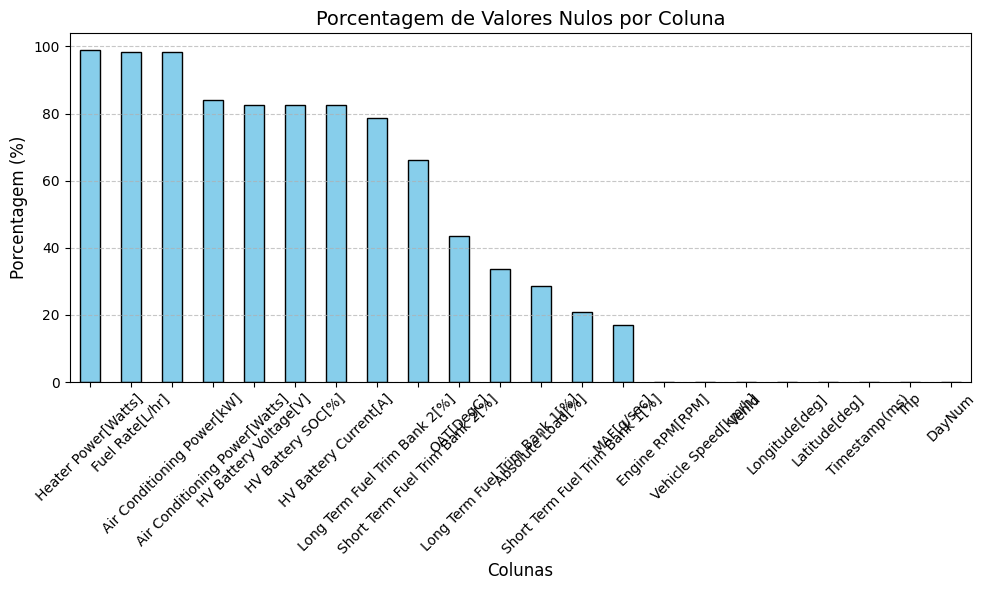

In [ ]:
# df = pd.DataFrame(data)

# Calcular a porcentagem de valores nulos
percent_null = df.isnull().mean() * 100  # Porcentagem por coluna

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
percent_null.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Porcentagem de Valores Nulos por Coluna", fontsize=14)
plt.ylabel("Porcentagem (%)", fontsize=12)
plt.xlabel("Colunas", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Fase 1.1: Engenharia de Dados - Derivação do campo "datetime"

In [ ]:
df = df.sort_values(by=['VehId','Trip', 'Timestamp(ms)'], ascending=True)


df

,DayNum,VehId,Trip,Timestamp(ms),Latitude[deg],Longitude[deg],Vehicle Speed[km/h],MAF[g/sec],Engine RPM[RPM],Absolute Load[%],...,Air Conditioning Power[kW],Air Conditioning Power[Watts],Heater Power[Watts],HV Battery Current[A],HV Battery SOC[%],HV Battery Voltage[V],Short Term Fuel Trim Bank 1[%],Short Term Fuel Trim Bank 2[%],Long Term Fuel Trim Bank 1[%],Long Term Fuel Trim Bank 2[%]
187554,6.684806,12,307,0,42.295426,-83.705094,37.0,4.170000,1117.0,21.568628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187555,6.684806,12,307,2100,42.295426,-83.705094,25.0,4.170000,976.0,21.568628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187556,6.684806,12,307,4200,42.295426,-83.705094,23.0,4.170000,1969.0,21.568628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187557,6.684806,12,307,5200,42.295187,-83.704909,23.0,23.120001,1969.0,63.529411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187558,6.684806,12,307,6300,42.295187,-83.704909,30.0,23.120001,2084.0,63.529411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10672826,340.980754,603,1523,105200,42.305287,-83.799391,7.0,5.400000,713.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.56250,NaN,-0.78125,NaN
10672827,340.980754,603,1523,107400,42.305287,-83.799391,7.0,5.400000,713.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.78125,NaN,-0.78125,NaN
10672828,340.980754,603,1523,108000,42.305385,-83.799709,7.0,5.400000,713.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.78125,NaN,-0.78125,NaN
10672829,340.980754,603,1523,108800,42.305385,-83.799709,7.0,5.400000,2182.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.78125,NaN,-0.78125,NaN


In [ ]:
df['datetime'] = pd.to_datetime(df['DayNum'], unit='D', origin=pd.Timestamp('2017-11-01'))


min = df['datetime'].min()

max = df['datetime'].max()


print(df['DayNum'].min())

print(df['DayNum'].max())

print(df.shape)

1.01549324074
375.501194722
(11645928, 23)


In [ ]:
t = pd.DataFrame()

t = pd.date_range(start=min, end=max, periods=df.shape[0])


df['datetime'] = t

df.datetime

187554     2017-11-02 00:22:18.615999815
187555     2017-11-02 00:22:21.394272820
187556     2017-11-02 00:22:24.172545825
187557     2017-11-02 00:22:26.950818831
187558     2017-11-02 00:22:29.729091836
                        ...             
10672826   2018-11-11 12:01:32.110888859
10672827   2018-11-11 12:01:34.889161863
10672828   2018-11-11 12:01:37.667434867
10672829   2018-11-11 12:01:40.445707875
10672830   2018-11-11 12:01:43.223980879
Name: datetime, Length: 11645928, dtype: datetime64[ns]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']).round('s')

df.datetime

187554     2017-11-02 00:22:18.615999815
187555     2017-11-02 00:22:21.394272820
187556     2017-11-02 00:22:24.172545825
187557     2017-11-02 00:22:26.950818831
187558     2017-11-02 00:22:29.729091836
                        ...             
10672826   2018-11-11 12:01:32.110888859
10672827   2018-11-11 12:01:34.889161863
10672828   2018-11-11 12:01:37.667434867
10672829   2018-11-11 12:01:40.445707875
10672830   2018-11-11 12:01:43.223980879
Name: datetime, Length: 11645928, dtype: datetime64[ns]

In [ ]:
df = df.rename(columns={'Latitude[deg]':'lat', 'Longitude[deg]':'lon'})

df['Trip_VehId'] = df['VehId'].astype(str).str.cat(df['Trip'].astype(str), sep="")
df['Trip_VehId'] = df['Trip_VehId'].astype(int)

In [ ]:
df = df[['VehId','Trip', 'datetime','lon','lat','Trip_VehId']]

df

,VehId,Trip,datetime,lon,lat,Trip_VehId
187554,12,307,2017-11-02 00:22:18.615999815,-83.705094,42.295426,12307
187555,12,307,2017-11-02 00:22:21.394272820,-83.705094,42.295426,12307
187556,12,307,2017-11-02 00:22:24.172545825,-83.705094,42.295426,12307
187557,12,307,2017-11-02 00:22:26.950818831,-83.704909,42.295187,12307
187558,12,307,2017-11-02 00:22:29.729091836,-83.704909,42.295187,12307
...,...,...,...,...,...,...
10672826,603,1523,2018-11-11 12:01:32.110888859,-83.799391,42.305287,6031523
10672827,603,1523,2018-11-11 12:01:34.889161863,-83.799391,42.305287,6031523
10672828,603,1523,2018-11-11 12:01:37.667434867,-83.799709,42.305385,6031523
10672829,603,1523,2018-11-11 12:01:40.445707875,-83.799709,42.305385,6031523


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df

,VehId,Trip,datetime,lon,lat,Trip_VehId
187554,12,307,2017-11-02 00:22:18.615999815,-83.705094,42.295426,12307
187555,12,307,2017-11-02 00:22:21.394272820,-83.705094,42.295426,12307
187556,12,307,2017-11-02 00:22:24.172545825,-83.705094,42.295426,12307
187557,12,307,2017-11-02 00:22:26.950818831,-83.704909,42.295187,12307
187558,12,307,2017-11-02 00:22:29.729091836,-83.704909,42.295187,12307
...,...,...,...,...,...,...
10672826,603,1523,2018-11-11 12:01:32.110888859,-83.799391,42.305287,6031523
10672827,603,1523,2018-11-11 12:01:34.889161863,-83.799391,42.305287,6031523
10672828,603,1523,2018-11-11 12:01:37.667434867,-83.799709,42.305385,6031523
10672829,603,1523,2018-11-11 12:01:40.445707875,-83.799709,42.305385,6031523


In [ ]:
df['VehId'].unique()

array([ 12, 128, 133, 135, 140, 145, 155, 156, 180, 181, 184, 185, 200,
       201, 202, 203, 205, 208, 213, 218, 220, 223, 228, 231, 232, 242,
       249, 250, 251, 258, 259, 265, 266, 267, 273, 275, 276, 278, 282,
       283, 285, 292, 301, 303, 304, 307, 308, 309, 311, 323, 340, 346,
       347, 356, 359, 366, 367, 371, 372, 382, 384, 385, 388, 389, 450,
       452, 457, 459, 463, 465, 476, 480, 488, 490, 494, 507, 519, 521,
       529, 530, 531, 538, 540, 546, 547, 557, 560, 561, 564, 565, 575,
       577, 581, 584, 591, 592, 595, 597, 603], dtype=int64)

In [ ]:
df.VehId.nunique()

99

In [ ]:
# df.to_csv('dados_top99_veiculos_filtrado.csv')

### Fase 2: Extração das subtrajetórios e dos pontos de partida e de chegada

### Fase 2.1: Importações Necessárias

In [ ]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
# import hvplot.pandas

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
# from holoviews import opts

import warnings

warnings.filterwarnings("ignore")

#opts.defaults(
#    opts.Overlay(active_tools=["wheel_zoom"], frame_width=500, frame_height=400)
#)

mpd.show_versions()


MovingPandas 0.19.0

SYSTEM INFO
-----------
python     : 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:27:34) [MSC v.1937 64 bit (AMD64)]
executable : C:\Users\firmi\.local\share\mamba\envs\mpd-ex\python.exe
machine    : Windows-10-10.0.26100-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.8.2
GDAL data dir: None
PROJ       : 9.3.1
PROJ data dir: C:\Users\firmi\.local\share\mamba\envs\mpd-ex\Library\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.14.2
pandas     : 2.2.2
fiona      : 1.9.5
numpy      : 1.26.2
shapely    : 2.0.2
pyproj     : 3.6.1
matplotlib : 3.7.3
mapclassify: 2.5.0
geopy      : 2.4.1
holoviews  : 1.20.0
hvplot     : 0.11.1
geoviews   : 1.13.0
stonesoup  : 1.1


In [ ]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')


mpd.show_versions()


MovingPandas 0.19.0

SYSTEM INFO
-----------
python     : 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:27:34) [MSC v.1937 64 bit (AMD64)]
executable : C:\Users\firmi\.local\share\mamba\envs\mpd-ex\python.exe
machine    : Windows-10-10.0.26100-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.8.2
GDAL data dir: None
PROJ       : 9.3.1
PROJ data dir: C:\Users\firmi\.local\share\mamba\envs\mpd-ex\Library\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.14.2
pandas     : 2.2.2
fiona      : 1.9.5
numpy      : 1.26.2
shapely    : 2.0.2
pyproj     : 3.6.1
matplotlib : 3.7.3
mapclassify: 2.5.0
geopy      : 2.4.1
holoviews  : 1.20.0
hvplot     : 0.11.1
geoviews   : 1.13.0
stonesoup  : 1.1


In [ ]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}

mpd.show_versions()


MovingPandas 0.19.0

SYSTEM INFO
-----------
python     : 3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:27:34) [MSC v.1937 64 bit (AMD64)]
executable : C:\Users\firmi\.local\share\mamba\envs\mpd-ex\python.exe
machine    : Windows-10-10.0.26100-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.8.2
GDAL data dir: None
PROJ       : 9.3.1
PROJ data dir: C:\Users\firmi\.local\share\mamba\envs\mpd-ex\Library\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.14.2
pandas     : 2.2.2
fiona      : 1.9.5
numpy      : 1.26.2
shapely    : 2.0.2
pyproj     : 3.6.1
matplotlib : 3.7.3
mapclassify: 2.5.0
geopy      : 2.4.1
holoviews  : 1.20.0
hvplot     : 0.11.1
geoviews   : 1.13.0
stonesoup  : 1.1


### Fase 2.2: Verificação e Processamento com eliminação de datetimes repetidos

In [ ]:
import pandas as pd

df = pd.read_csv('dados_top99_veiculos_filtrado.csv')

df['VehId'].nunique()

99

In [ ]:
import movingpandas as mpd
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from datetime import timedelta
import logging
import time
import multiprocessing as mp
from tqdm import tqdm
import numpy as np
import warnings
import psutil
import os
import gc

def configurar_logger():
    """Configura e retorna um logger para o script."""
    logger = logging.getLogger('processamento_trajetorias')

    # Evitar duplicação de handlers se o logger já tiver sido configurado
    if logger.handlers:
        return logger

    logger.setLevel(logging.INFO)

    # Criar manipulador de arquivo
    file_handler = logging.FileHandler('processamento_trajetorias.log')
    file_handler.setLevel(logging.INFO)

    # Criar manipulador de console
    console_handler = logging.StreamHandler()
    console_handler.setLevel(logging.INFO)

    # Definir formato
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    file_handler.setFormatter(formatter)
    console_handler.setFormatter(formatter)

    # Adicionar manipuladores ao logger
    logger.addHandler(file_handler)
    logger.addHandler(console_handler)

    return logger

def monitorar_memoria(logger):
    """Monitora e registra o uso de memória."""
    processo = psutil.Process(os.getpid())
    uso_memoria = processo.memory_info().rss / 1024 / 1024  # Converter para MB
    uso_memoria_percentual = processo.memory_percent()

    # Obter informações sobre memória do sistema
    mem = psutil.virtual_memory()
    mem_disponivel = mem.available / 1024 / 1024  # MB

    logger.info(f"Uso de memória: {uso_memoria:.1f} MB ({uso_memoria_percentual:.1f}%) | Disponível: {mem_disponivel:.1f} MB")

    # Alertar se o uso de memória estiver muito alto
    if uso_memoria_percentual > 80:
        logger.warning("ALERTA: Uso de memória acima de 80%!")

    return uso_memoria

def processar_veiculo(args):
    """
    Processa um único veículo para dividir suas trajetórias em subtrajetórias,
    preservando a integridade espacial e temporal dos dados.

    Args:
        args: Tupla contendo (veh_id, group, parâmetros)

    Returns:
        Tupla de listas (subtrajetorias, origens, destinos) para o veículo
    """
    veh_id, group, params = args
    max_diameter = params['max_diameter']
    min_duration = params['min_duration']
    min_length = params['min_length']

    # Listas locais para armazenar os resultados deste veículo
    sub_veic = []
    orig_veic = []
    dest_veic = []

    try:
        # Otimização 1: Reduzir o tamanho do dataframe logo no início
        # Manter apenas as colunas necessárias
        colunas_necessarias = ['VehId', 'Trip', 'datetime', 'lon', 'lat']
        colunas_extras = [col for col in group.columns if col not in colunas_necessarias]
        group = group[colunas_necessarias + colunas_extras[:5]]  # Mantém até 5 colunas extras se existirem

        # Otimização 2: Verificar se há pontos suficientes para processamento
        if len(group) < 5:  # Se houver menos de 5 pontos, não há trajetória significativa
            print(f"Veículo {veh_id} tem menos de 5 pontos, ignorando.")
            return [], [], []

        # Garantir que os dados estão ordenados por tempo - crucial para desempenho
        group = group.sort_values('datetime')

        # Otimização 3: Pré-filtrar pontos muito próximos no tempo para reduzir volume
        if len(group) > 1000:  # Apenas para trajetórias realmente grandes
            group = group.drop_duplicates(subset=['datetime'])  # Remove pontos com timestamp idêntico

        # Otimização 4: Converter para numpy arrays para manipulações mais rápidas
        lat_array = group['lat'].values
        lon_array = group['lon'].values

        # Verificação rápida de qualidade de dados antes de processar
        if np.isnan(lat_array).any() or np.isnan(lon_array).any():
            # Limpar NaNs nos dados
            group = group.dropna(subset=['lat', 'lon'])
            lat_array = group['lat'].values
            lon_array = group['lon'].values
            if len(group) < 5:
                print(f"Veículo {veh_id} tem dados insuficientes após remoção de NaNs.")
                return [], [], []

        # Otimização 5: Usar conversão direta de arrays para geometria
        geometry = gpd.points_from_xy(lon_array, lat_array)

        # Criar GeoDataFrame - otimizado com os arrays pré-processados
        gdf = gpd.GeoDataFrame(
            group,
            geometry=geometry,
            crs="EPSG:4326"
        )

        # Otimização 6: Desativar avisos para aumentar velocidade
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            # Criar a TrajectoryCollection para o veículo
            trajectory_collection = mpd.TrajectoryCollection(
                gdf,
                traj_id_col='Trip',
                obj_id_col='VehId',
                t="datetime",
                crs="EPSG:4326"
            )

            # Otimização 7: Usar configurações mais agressivas para o StopSplitter
            stop_splitter = mpd.StopSplitter(trajectory_collection)
            stops = stop_splitter.split(
                max_diameter=max_diameter,
                min_duration=min_duration,
                min_length=min_length
            )

        # Processar cada subtrajetória individualmente
        for idx, subtraj in enumerate(stops, start=1):
            # Otimização 8: Usar referência em vez de cópia quando possível
            subtraj.id = f"{veh_id}_subtraj_{idx}"

            # Adicionar as subtrajetórias à lista
            sub_veic.append(subtraj)

            try:
                # Otimização 9: Extrair atributos apenas uma vez e reutilizar
                start_point = subtraj.get_start_location()
                end_point = subtraj.get_end_location()
                start_time = subtraj.get_start_time()
                end_time = subtraj.get_end_time()

                # Otimização 10: Criar dicionários de forma mais eficiente
                origem = {
                    'VehId': veh_id,
                    'Trip': subtraj.id,
                    'datetime': start_time,
                    'lon': start_point.x,
                    'lat': start_point.y,
                    'geometry': start_point
                }

                destino = {
                    'VehId': veh_id,
                    'Trip': subtraj.id,
                    'datetime': end_time,
                    'lon': end_point.x,
                    'lat': end_point.y,
                    'geometry': end_point
                }

                orig_veic.append(origem)
                dest_veic.append(destino)
            except Exception as e:
                print(f"Erro ao processar subtrajetória {subtraj.id}: {str(e)}")
                continue

    except Exception as e:
        print(f"Erro ao processar veículo {veh_id}: {str(e)}")
        return [], [], []

    return sub_veic, orig_veic, dest_veic

def processar_trajetorias(df, max_diameter=100, min_duration=timedelta(minutes=30),
                         min_length=1000, n_processos=None, veiculos_por_batch=1,
                         usar_dask=False, usar_prefiltro=True):
    """
    Processa trajetórias com alto desempenho para grandes volumes de dados,
    mantendo a integridade do StopSplitter ao processar trajetórias completas.
    Processa os veículos em batches com o número especificado de veículos por batch.

    Args:
        df: DataFrame com os dados das trajetórias
        max_diameter: Diâmetro máximo em metros para uma parada
        min_duration: Duração mínima para considerar uma parada
        min_length: Comprimento mínimo das subtrajetórias em metros
        n_processos: Número de processos paralelos (None = usa CPU cores - 1)
        veiculos_por_batch: Número de veículos a processar por vez (padrão: 1)
        usar_dask: Se True, usa Dask para operações paralelas (experimental)
        usar_prefiltro: Se True, aplica pré-filtros para reduzir volume de dados

    Returns:
        Tupla (origens_df, destinos_df, subtrajetorias_gdf)
    """
    # Configurar logger
    logger = configurar_logger()
    logger.info("Iniciando processamento de trajetórias")
    logger.info(f"Processando dataframe com {len(df)} registros")

    # Verificar tipos de dados antes do processamento
    n_veiculos = df['VehId'].nunique()
    logger.info(f"DataFrame contém {n_veiculos} veículos únicos")

    # Otimização 1: Pré-filtro global para reduzir volume de dados

    if usar_prefiltro and len(df) > 1000000:
        logger.info("Aplicando pré-filtro global para reduzir volume de dados")
        # Reduzir duplicatas de timestamps por veículo
        df = df.sort_values(['VehId', 'datetime']).reset_index(drop=True)

        # Garantir que datetime está no formato correto antes de fazer operações
        if not pd.api.types.is_datetime64_any_dtype(df['datetime']):
            logger.info("Convertendo campo datetime para formato correto antes do pré-filtro")
            df['datetime'] = pd.to_datetime(df['datetime'])

        df['prev_datetime'] = df.groupby('VehId')['datetime'].shift(1)

        # Agora a subtração funcionará corretamente com objetos datetime
        df['diff_seconds'] = (df['datetime'] - df['prev_datetime']).dt.total_seconds()
        df = df[df['diff_seconds'].isna() | (df['diff_seconds'] >= 1)]
        df = df.drop(['prev_datetime', 'diff_seconds'], axis=1)
        logger.info(f"Após pré-filtro: {len(df)} registros")

    # Otimização 2: Usar JIT compiler se disponível
    try:
        import numba
        logger.info("Numba JIT disponível para otimizações")
        usar_numba = True
    except ImportError:
        logger.info("Numba JIT não disponível")
        usar_numba = False

    # Configurar o número de processos para multiprocessamento
    if n_processos is None:
        n_processos = max(1, mp.cpu_count() - 1)
    logger.info(f"Utilizando {n_processos} processos para processamento paralelo")
    logger.info(f"Processando {veiculos_por_batch} veículos por batch")

    # Verificar e converter campos de data se necessário
    if not pd.api.types.is_datetime64_any_dtype(df['datetime']):
        logger.info("Convertendo campo datetime para formato correto")
        df['datetime'] = pd.to_datetime(df['datetime'])

    # Otimização 3: Verificar se precisamos aumentar o limite de recursão
    import sys
    recursion_limit = sys.getrecursionlimit()
    if recursion_limit < 5000:
        logger.info(f"Aumentando limite de recursão de {recursion_limit} para 5000")
        sys.setrecursionlimit(5000)

    # Parâmetros para o processamento
    params = {
        'max_diameter': max_diameter,
        'min_duration': min_duration,
        'min_length': min_length
    }

    # Registrar parâmetros
    logger.info(f"Parâmetros: max_diameter={max_diameter}m, min_duration={min_duration}, min_length={min_length}m")

    start_time = time.time()
    monitorar_memoria(logger)

    # Listas para armazenar os resultados finais consolidados
    todas_origens_df = []
    todos_destinos_df = []
    todos_subtrajetorias_gdf = []

    # Otimização 4: Preparar batches com inteligência - priorizar veículos menores primeiro
    if veiculos_por_batch == 1:
        # Para 1 veículo por batch, ordenar por tamanho para processar os menores primeiro
        tamanho_por_veiculo = df.groupby('VehId').size().reset_index()
        tamanho_por_veiculo.columns = ['VehId', 'tamanho']
        tamanho_por_veiculo = tamanho_por_veiculo.sort_values('tamanho')
        veiculos_ordenados = tamanho_por_veiculo['VehId'].tolist()

        logger.info("Veículos ordenados por tamanho (processando menores primeiro)")

        # Criar grupos na ordem otimizada
        veiculo_grupos = []
        for veh_id in veiculos_ordenados:
            group = df[df['VehId'] == veh_id]
            if len(group) >= 5:  # Ignorar veículos com poucos pontos
                veiculo_grupos.append((veh_id, group, params))
    else:
        # Método padrão para múltiplos veículos por batch
        veiculo_grupos = [(veh_id, group, params) for veh_id, group in df.groupby('VehId')]

    logger.info(f"Preparados {len(veiculo_grupos)} veículos para processamento")

    # Calcular número total de batches
    total_batches = (len(veiculo_grupos) + veiculos_por_batch - 1) // veiculos_por_batch
    logger.info(f"O processamento será feito em {total_batches} batches de {veiculos_por_batch} veículos")

    # Otimização 5: Definir chunk size para map para melhorar desempenho
    if n_processos > 1:
        chunksize = max(1, len(veiculo_grupos) // (n_processos * 4))
        logger.info(f"Usando chunksize de {chunksize} para multiprocessing")
    else:
        chunksize = 1

    # Processar veículos em batches do tamanho especificado
    for i in range(0, len(veiculo_grupos), veiculos_por_batch):
        # Obter o batch atual de veículos
        batch_atual = veiculo_grupos[i:i + veiculos_por_batch]
        batch_num = i // veiculos_por_batch + 1

        logger.info(f"Processando batch {batch_num}/{total_batches} com {len(batch_atual)} veículos")

        # Otimização 6: Ajustar processamento baseado no tamanho do batch
        if len(batch_atual) == 1:
            # Para um único veículo, processar sem overhead de multiprocessing
            veh_id = batch_atual[0][0]
            logger.info(f"Processando veículo único: {veh_id}")
            resultados = [processar_veiculo(batch_atual[0])]
        else:
            # Processar o batch atual em paralelo
            with mp.Pool(processes=min(n_processos, len(batch_atual))) as pool:
                resultados = list(tqdm(
                    pool.imap(processar_veiculo, batch_atual, chunksize=chunksize),
                    total=len(batch_atual),
                    desc=f"Processando batch {batch_num}/{total_batches}"
                ))

        # Listas para armazenar os resultados deste batch
        batch_subtrajetorias = []
        batch_origens = []
        batch_destinos = []

        # Acumular resultados do batch atual
        for sub_veic, orig_veic, dest_veic in resultados:
            batch_subtrajetorias.extend(sub_veic)
            batch_origens.extend(orig_veic)
            batch_destinos.extend(dest_veic)

        # Processar os resultados do batch atual IMEDIATAMENTE
        logger.info(f"Convertendo resultados do batch {batch_num} para DataFrames")

        if batch_subtrajetorias:
            # Otimização 7: Processamento mais eficiente de subtrajetórias
            try:
                # Converter subtrajetórias do batch para GeoDataFrame
                logger.info(f"Convertendo {len(batch_subtrajetorias)} subtrajetórias do batch para GeoDataFrame")
                # Processar em chunks se houver muitas subtrajetórias
                if len(batch_subtrajetorias) > 100:
                    logger.info("Processando subtrajetórias em chunks para otimizar memória")
                    chunks = [batch_subtrajetorias[i:i+100] for i in range(0, len(batch_subtrajetorias), 100)]
                    partial_gdfs = []
                    for chunk_idx, chunk in enumerate(chunks):
                        logger.info(f"Processando chunk {chunk_idx+1}/{len(chunks)}")
                        chunk_gdf = mpd.TrajectoryCollection(chunk).to_traj_gdf()
                        partial_gdfs.append(chunk_gdf)
                    batch_subtraj_gdf = pd.concat(partial_gdfs, ignore_index=True)
                else:
                    batch_subtraj_gdf = mpd.TrajectoryCollection(batch_subtrajetorias).to_traj_gdf()
                todos_subtrajetorias_gdf.append(batch_subtraj_gdf)
                logger.info(f"GeoDataFrame de subtrajetórias do batch {batch_num} criado")
            except Exception as e:
                logger.error(f"Erro ao converter subtrajetórias: {str(e)}")
                if batch_subtrajetorias:
                    logger.warning("Tentando salvar subtrajetórias individualmente")
                    for idx, subtraj in enumerate(batch_subtrajetorias):
                        try:
                            single_gdf = mpd.TrajectoryCollection([subtraj]).to_traj_gdf()
                            todos_subtrajetorias_gdf.append(single_gdf)
                        except Exception as inner_e:
                            logger.error(f"Erro na subtrajetória {idx}: {str(inner_e)}")

        if batch_origens:
            # Otimização 8: Conversão mais eficiente de origens/destinos
            logger.info(f"Convertendo {len(batch_origens)} origens do batch para DataFrame")
            batch_origens_df = pd.DataFrame([{k: v for k, v in d.items() if k != 'geometry'}
                                           for d in batch_origens])
            todas_origens_df.append(batch_origens_df)

        if batch_destinos:
            logger.info(f"Convertendo {len(batch_destinos)} destinos do batch para DataFrame")
            batch_destinos_df = pd.DataFrame([{k: v for k, v in d.items() if k != 'geometry'}
                                            for d in batch_destinos])
            todos_destinos_df.append(batch_destinos_df)

        logger.info(f"Batch {batch_num}/{total_batches} concluído e convertido para DataFrames")
        monitorar_memoria(logger)

        # Otimização 9: Limpeza agressiva de memória entre batches
        batch_subtrajetorias.clear()
        batch_origens.clear()
        batch_destinos.clear()
        resultados.clear()

        # Forçar coleta de lixo entre batches
        gc.collect()

        # Otimização 10: Armazenar resultados parciais periodicamente
        if batch_num % 10 == 0 or batch_num == total_batches:
            logger.info(f"Salvando resultados parciais após batch {batch_num}")
            try:
                # Criar DataFrames parciais
                if todas_origens_df:
                    pd.concat(todas_origens_df, ignore_index=True).to_csv(f'origens_parcial_{batch_num}.csv', index=False)
                if todos_destinos_df:
                    pd.concat(todos_destinos_df, ignore_index=True).to_csv(f'destinos_parcial_{batch_num}.csv', index=False)
                # Apenas log para subtrajetórias, pois salvar GeoDataFrames pode ser custoso
                logger.info(f"Batches de GeoDataFrames acumulados: {len(todos_subtrajetorias_gdf)}")
            except Exception as e:
                logger.error(f"Erro ao salvar resultados parciais: {str(e)}")

    # Combinar todos os DataFrames dos batches
    logger.info("Combinando DataFrames de todos os batches")

    if todas_origens_df:
        origens_df = pd.concat(todas_origens_df, ignore_index=True)
        logger.info(f"DataFrame de origens combinado: {len(origens_df)} registros")
    else:
        origens_df = pd.DataFrame()
        logger.info("Nenhuma origem foi encontrada")

    if todos_destinos_df:
        destinos_df = pd.concat(todos_destinos_df, ignore_index=True)
        logger.info(f"DataFrame de destinos combinado: {len(destinos_df)} registros")
    else:
        destinos_df = pd.DataFrame()
        logger.info("Nenhum destino foi encontrado")

    if todos_subtrajetorias_gdf:
        # Combinar GeoDataFrames de subtrajetórias
        try:
            logger.info("Combinando GeoDataFrames de subtrajetórias")
            # Tentar combinar diretamente os GeoDataFrames
            subtrajetorias_gdf = pd.concat(todos_subtrajetorias_gdf, ignore_index=True)
            logger.info(f"GeoDataFrame de subtrajetórias combinado: {len(subtrajetorias_gdf)} registros")
        except Exception as e:
            logger.error(f"Erro ao combinar GeoDataFrames de subtrajetórias: {str(e)}")
            # Retornar o primeiro GeoDataFrame se houver erro na combinação
            subtrajetorias_gdf = todos_subtrajetorias_gdf[0] if todos_subtrajetorias_gdf else gpd.GeoDataFrame()
            logger.warning("Retornando apenas o primeiro GeoDataFrame de subtrajetórias devido ao erro")
    else:
        subtrajetorias_gdf = gpd.GeoDataFrame()
        logger.info("Nenhuma subtrajetória foi encontrada")

    tempo_total = time.time() - start_time
    logger.info(f"Processamento concluído em {tempo_total:.2f} segundos")

    # Otimização 11: Limpar todas as coleções para liberar memória antes de retornar
    todas_origens_df.clear()
    todos_destinos_df.clear()
    todos_subtrajetorias_gdf.clear()
    gc.collect()

    return origens_df, destinos_df, subtrajetorias_gdf

In [ ]:
# Então chame a função
origens_df, destinos_df, subtrajetorias_gdf = processar_trajetorias(
    df,
    max_diameter=100,
    min_duration=timedelta(minutes=30),
    min_length=1000,
    veiculos_por_batch=1
)

2025-05-10 20:57:25,464 - processamento_trajetorias - INFO - Iniciando processamento de trajetórias
2025-05-10 20:57:25,465 - processamento_trajetorias - INFO - Processando dataframe com 11645928 registros
2025-05-10 20:57:25,628 - processamento_trajetorias - INFO - DataFrame contém 99 veículos únicos
2025-05-10 20:57:25,632 - processamento_trajetorias - INFO - Aplicando pré-filtro global para reduzir volume de dados
2025-05-10 20:58:28,895 - processamento_trajetorias - INFO - Convertendo campo datetime para formato correto antes do pré-filtro
2025-05-10 20:58:52,986 - processamento_trajetorias - INFO - Após pré-filtro: 11645928 registros
2025-05-10 20:58:54,702 - processamento_trajetorias - INFO - Numba JIT disponível para otimizações
2025-05-10 20:58:54,704 - processamento_trajetorias - INFO - Utilizando 11 processos para processamento paralelo
2025-05-10 20:58:54,705 - processamento_trajetorias - INFO - Processando 1 veículos por batch
2025-05-10 20:58:54,707 - processamento_trajeto

In [ ]:
origens_df

,VehId,Trip,datetime,lon,lat
0,581,581_subtraj_1,2018-10-20 10:46:34.157820,-83.692538,42.304893
1,581,581_subtraj_2,2018-10-20 10:53:19.785679,-83.677460,42.309408
2,581,581_subtraj_3,2018-10-20 11:08:00.498221,-83.704304,42.302994
3,581,581_subtraj_4,2018-10-20 11:27:24.594611,-83.677297,42.309491
4,581,581_subtraj_5,2018-10-20 11:44:13.107712,-83.692957,42.304889
...,...,...,...,...,...
14493,560,560_subtraj_389,2018-09-16 11:00:48.460099,-83.674250,42.274556
14494,560,560_subtraj_390,2018-09-16 12:01:33.554282,-83.674177,42.274469
14495,560,560_subtraj_391,2018-09-16 13:14:51.560450,-83.674040,42.274445
14496,560,560_subtraj_392,2018-09-16 15:26:49.638516,-83.674123,42.274450


In [ ]:
destinos_df

,VehId,Trip,datetime,lon,lat
0,581,581_subtraj_1,2018-10-20 10:53:14.229133,-83.678060,42.309191
1,581,581_subtraj_2,2018-10-20 11:07:54.941675,-83.703473,42.302629
2,581,581_subtraj_3,2018-10-20 11:27:19.038065,-83.678244,42.309001
3,581,581_subtraj_4,2018-10-20 11:44:07.551166,-83.704162,42.302600
4,581,581_subtraj_5,2018-10-20 11:52:08.192396,-83.677648,42.309168
...,...,...,...,...,...
14493,560,560_subtraj_389,2018-09-16 12:01:27.997736,-83.740791,42.283069
14494,560,560_subtraj_390,2018-09-16 13:14:46.003904,-83.745824,42.283188
14495,560,560_subtraj_391,2018-09-16 15:26:44.081970,-83.674871,42.252766
14496,560,560_subtraj_392,2018-09-16 18:26:40.450869,-83.674783,42.274430


In [ ]:
subtrajetorias_gdf

,Trip,start_t,end_t,geometry,length,direction
0,581_subtraj_1,2018-10-20 10:46:34.157820,2018-10-20 10:53:14.229133,"LINESTRING (-83.69254 42.30489, -83.69254 42.3...",1287.656351,68.123408
1,581_subtraj_2,2018-10-20 10:53:19.785679,2018-10-20 11:07:54.941675,"LINESTRING (-83.67746 42.30941, -83.67746 42.3...",2284.455995,250.596771
2,581_subtraj_3,2018-10-20 11:08:00.498221,2018-10-20 11:27:19.038065,"LINESTRING (-83.70430 42.30299, -83.70430 42.3...",2307.207733,72.682234
3,581_subtraj_4,2018-10-20 11:27:24.594611,2018-10-20 11:44:07.551166,"LINESTRING (-83.67730 42.30949, -83.67730 42.3...",2353.513015,250.880459
4,581_subtraj_5,2018-10-20 11:44:13.107712,2018-10-20 11:52:08.192396,"LINESTRING (-83.69296 42.30489, -83.69296 42.3...",1351.515409,69.290817
...,...,...,...,...,...,...
14493,560_subtraj_389,2018-09-16 11:00:48.460099,2018-09-16 12:01:27.997736,"LINESTRING (-83.67425 42.27456, -83.67425 42.2...",6337.209540,279.833649
14494,560_subtraj_390,2018-09-16 12:01:33.554282,2018-09-16 13:14:46.003904,"LINESTRING (-83.67418 42.27447, -83.67418 42.2...",6794.561035,279.364905
14495,560_subtraj_391,2018-09-16 13:14:51.560450,2018-09-16 15:26:44.081970,"LINESTRING (-83.67404 42.27445, -83.67404 42.2...",14925.335438,181.624284
14496,560_subtraj_392,2018-09-16 15:26:49.638516,2018-09-16 18:26:40.450869,"LINESTRING (-83.67412 42.27445, -83.67412 42.2...",16347.795002,267.623512


In [ ]:
origens_df.to_csv('origens.csv', index=False)
destinos_df.to_csv('destinos.csv', index=False)
subtrajetorias_gdf.to_file('subtrajetorias.gpkg', driver='GPKG')

In [ ]:

'''
import pandas as pd
import geopandas as gpd
from datetime import timedelta
import os

def filter_trajectories_by_duration(min_duration_minutes=30):
    """
    Filtra subtrajetórias, origens e destinos para garantir que todas as trajetórias
    tenham pelo menos a duração mínima especificada.

    Args:
        min_duration_minutes: Duração mínima em minutos

    Returns:
        Tupla com (origens_filtradas, destinos_filtrados, subtrajetorias_filtradas)
    """
    print(f"Filtrando trajetórias com duração mínima de {min_duration_minutes} minutos...")

    # Arquivos de entrada
    origins_file = "origins_final.csv"  # ou "origins.csv"
    destinations_file = "destinations_final.csv"  # ou "destinations.csv"
    subtraj_file = "subtrajectories_final.gpkg"  # ou "subtrajectories.gpkg"

    # Verificar se os arquivos existem
    for file in [origins_file, destinations_file, subtraj_file]:
        if not os.path.exists(file):
            print(f"Arquivo {file} não encontrado!")
            return None, None, None

    # Carregar arquivos
    print("Carregando arquivos de dados...")
    origens_df = pd.read_csv(origins_file)
    destinos_df = pd.read_csv(destinations_file)

    try:
        subtrajetorias_gdf = gpd.read_file(subtraj_file)
    except Exception as e:
        print(f"Erro ao ler arquivo GPKG: {e}")
        return None, None, None

    # Converter colunas de data/hora para datetime
    print("Convertendo colunas de data/hora...")
    origens_df['datetime'] = pd.to_datetime(origens_df['datetime'])
    destinos_df['datetime'] = pd.to_datetime(destinos_df['datetime'])

    # Criar um dicionário para mapear Trip -> datetime (origem e destino)
    trip_start_time = origens_df.set_index('Trip')['datetime'].to_dict()
    trip_end_time = destinos_df.set_index('Trip')['datetime'].to_dict()

    # Calcular duração para cada trajetória
    print("Calculando duração das trajetórias...")
    trajectories_duration = {}
    for trip_id in set(trip_start_time.keys()).intersection(trip_end_time.keys()):
        start_time = trip_start_time.get(trip_id)
        end_time = trip_end_time.get(trip_id)

        if start_time is not None and end_time is not None:
            duration = end_time - start_time
            trajectories_duration[trip_id] = duration

    # Identificar trajetórias que atendem ao critério de duração mínima
    min_duration = timedelta(minutes=min_duration_minutes)
    valid_trips = [trip_id for trip_id, duration in trajectories_duration.items()
                   if duration >= min_duration]

    print(f"Total de trajetórias: {len(trajectories_duration)}")
    print(f"Trajetórias com duração >= {min_duration_minutes} minutos: {len(valid_trips)}")

    # Filtrar DataFrames
    origens_filtradas = origens_df[origens_df['Trip'].isin(valid_trips)]
    destinos_filtrados = destinos_df[destinos_df['Trip'].isin(valid_trips)]

    # Identificar a coluna de Trip no GeoDataFrame de subtrajetórias
    trip_col = None
    for col in subtrajetorias_gdf.columns:
        if 'trip' in col.lower() or 'traj' in col.lower():
            print(f"Usando coluna '{col}' como identificador de trajetória")
            trip_col = col
            break

    if trip_col:
        subtrajetorias_filtradas = subtrajetorias_gdf[subtrajetorias_gdf[trip_col].isin(valid_trips)]
    else:
        print("ERRO: Não foi possível identificar a coluna Trip no GeoDataFrame de subtrajetórias")
        subtrajetorias_filtradas = subtrajetorias_gdf

    # Salvar arquivos filtrados
    print("Salvando arquivos filtrados...")
    origens_filtradas.to_csv("origins_filtered_30min.csv", index=False)
    destinos_filtrados.to_csv("destinations_filtered_30min.csv", index=False)
    subtrajetorias_filtradas.to_file("subtrajectories_filtered_30min.gpkg", driver="GPKG")

    # Gerar relatório
    print("\n=== RELATÓRIO DE FILTRAGEM ===")
    print(f"Origens originais: {len(origens_df)} -> Filtradas: {len(origens_filtradas)}")
    print(f"Destinos originais: {len(destinos_df)} -> Filtrados: {len(destinos_filtrados)}")
    print(f"Subtrajetórias originais: {len(subtrajetorias_gdf)} -> Filtradas: {len(subtrajetorias_filtradas)}")
    print(f"Redução: {100 * (1 - len(origens_filtradas) / len(origens_df)):.2f}%")

    return origens_filtradas, destinos_filtrados, subtrajetorias_filtradas

# Executar a filtragem
if __name__ == "__main__":
    origens_filtradas, destinos_filtrados, subtrajetorias_filtradas = filter_trajectories_by_duration(30)

    if origens_filtradas is not None:
        print("\nFiltragem concluída com sucesso.")
        print("Arquivos gerados:")
        print("  - origins_filtered_30min.csv")
        print("  - destinations_filtered_30min.csv")
        print("  - subtrajectories_filtered_30min.gpkg")
'''

Filtrando trajetórias com duração mínima de 30 minutos...
Carregando arquivos de dados...
Convertendo colunas de data/hora...
Calculando duração das trajetórias...
Total de trajetórias: 14498
Trajetórias com duração >= 30 minutos: 7068
Usando coluna 'Trip' como identificador de trajetória
Salvando arquivos filtrados...

=== RELATÓRIO DE FILTRAGEM ===
Origens originais: 14498 -> Filtradas: 7068
Destinos originais: 14498 -> Filtrados: 7068
Subtrajetórias originais: 14498 -> Filtradas: 7068
Redução: 51.25%

Filtragem concluída com sucesso.
Arquivos gerados:
  - origins_filtered_30min.csv
  - destinations_filtered_30min.csv
  - subtrajectories_filtered_30min.gpkg


### Fase 3: Tesselação

In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
origem_df = pd.read_csv('origens.csv')
chegada_df = pd.read_csv('destinos.csv')

origem_df

,VehId,Trip,datetime,lon,lat
0,581,581_subtraj_1,2018-10-20 10:46:34.157820,-83.692538,42.304893
1,581,581_subtraj_2,2018-10-20 10:53:19.785679,-83.677460,42.309408
2,581,581_subtraj_3,2018-10-20 11:08:00.498221,-83.704304,42.302994
3,581,581_subtraj_4,2018-10-20 11:27:24.594611,-83.677297,42.309491
4,581,581_subtraj_5,2018-10-20 11:44:13.107712,-83.692957,42.304889
...,...,...,...,...,...
14493,560,560_subtraj_389,2018-09-16 11:00:48.460099,-83.674250,42.274556
14494,560,560_subtraj_390,2018-09-16 12:01:33.554282,-83.674177,42.274469
14495,560,560_subtraj_391,2018-09-16 13:14:51.560450,-83.674040,42.274445
14496,560,560_subtraj_392,2018-09-16 15:26:49.638516,-83.674123,42.274450


In [ ]:
chegada_df

,VehId,Trip,datetime,lon,lat
0,581,581_subtraj_1,2018-10-20 10:53:14.229133,-83.678060,42.309191
1,581,581_subtraj_2,2018-10-20 11:07:54.941675,-83.703473,42.302629
2,581,581_subtraj_3,2018-10-20 11:27:19.038065,-83.678244,42.309001
3,581,581_subtraj_4,2018-10-20 11:44:07.551166,-83.704162,42.302600
4,581,581_subtraj_5,2018-10-20 11:52:08.192396,-83.677648,42.309168
...,...,...,...,...,...
14493,560,560_subtraj_389,2018-09-16 12:01:27.997736,-83.740791,42.283069
14494,560,560_subtraj_390,2018-09-16 13:14:46.003904,-83.745824,42.283188
14495,560,560_subtraj_391,2018-09-16 15:26:44.081970,-83.674871,42.252766
14496,560,560_subtraj_392,2018-09-16 18:26:40.450869,-83.674783,42.274430


In [ ]:
# Para o DataFrame de origem
original = gpd.GeoDataFrame(
    origem_df,
    geometry=gpd.points_from_xy(origem_df['lon'], origem_df['lat']),
    crs='EPSG:4326'
)

# Para o DataFrame de chegada
chegada = gpd.GeoDataFrame(
    chegada_df,
    geometry=gpd.points_from_xy(chegada_df['lon'], chegada_df['lat']),
    crs='EPSG:4326'
)

In [ ]:
original.columns

Index(['VehId', 'Trip', 'datetime', 'lon', 'lat', 'geometry'], dtype='object')

In [ ]:
chegada.columns

Index(['VehId', 'Trip', 'datetime', 'lon', 'lat', 'geometry'], dtype='object')

In [ ]:
gdf = gpd.read_file('subtrajetorias.gpkg', driver='GPKG')

gdf

C:\Users\firmi\.local\share\mamba\envs\mpd-ex\lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\Users\firmi\.local\share\mamba\envs\mpd-ex\lib\site-packages\geopandas\io\file.py:403: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore", utc=True)
C:\Users\firmi\.local\share\mamba\envs\mpd-ex\lib\site-packages\geopandas\io\file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
C:\Users\firmi\.local\share\mamba\envs\mpd-ex\lib\site-packages\geopandas\io\file.py:40

,Trip,start_t,end_t,length,direction,geometry
0,581_subtraj_1,2018-10-20T10:46:34.158001,2018-10-20T10:53:14.229000,1287.656351,68.123408,"LINESTRING (-83.69254 42.30489, -83.69254 42.3..."
1,581_subtraj_2,2018-10-20T10:53:19.785999,2018-10-20T11:07:54.942001,2284.455995,250.596771,"LINESTRING (-83.67746 42.30941, -83.67746 42.3..."
2,581_subtraj_3,2018-10-20T11:08:00.498000,2018-10-20T11:27:19.038000,2307.207733,72.682234,"LINESTRING (-83.70430 42.30299, -83.70430 42.3..."
3,581_subtraj_4,2018-10-20T11:27:24.594999,2018-10-20T11:44:07.551000,2353.513015,250.880459,"LINESTRING (-83.67730 42.30949, -83.67730 42.3..."
4,581_subtraj_5,2018-10-20T11:44:13.108000,2018-10-20T11:52:08.192000,1351.515409,69.290817,"LINESTRING (-83.69296 42.30489, -83.69296 42.3..."
...,...,...,...,...,...,...
14493,560_subtraj_389,2018-09-16T11:00:48.459999,2018-09-16T12:01:27.997999,6337.209540,279.833649,"LINESTRING (-83.67425 42.27456, -83.67425 42.2..."
14494,560_subtraj_390,2018-09-16T12:01:33.554001,2018-09-16T13:14:46.004002,6794.561035,279.364905,"LINESTRING (-83.67418 42.27447, -83.67418 42.2..."
14495,560_subtraj_391,2018-09-16T13:14:51.560001,2018-09-16T15:26:44.082001,14925.335438,181.624284,"LINESTRING (-83.67404 42.27445, -83.67404 42.2..."
14496,560_subtraj_392,2018-09-16T15:26:49.639000,2018-09-16T18:26:40.451000,16347.795002,267.623512,"LINESTRING (-83.67412 42.27445, -83.67412 42.2..."


In [ ]:
from shapely.geometry import Point

def origem_diferente_destino(geom, tolerancia=1e-8):
    """Verifica se a origem e destino são diferentes, com tolerância."""
    if geom.geom_type == 'LineString':
        p1 = Point(geom.coords[0])
        p2 = Point(geom.coords[-1])
        return p1.distance(p2) > tolerancia
    else:
        return True

# Aplicar filtro com tolerância
filtered_gdf = gdf[gdf.geometry.apply(origem_diferente_destino)]

In [ ]:
filtered_gdf

,Trip,start_t,end_t,length,direction,geometry
0,581_subtraj_1,2018-10-20T10:46:34.158001,2018-10-20T10:53:14.229000,1287.656351,68.123408,"LINESTRING (-83.69254 42.30489, -83.69254 42.3..."
1,581_subtraj_2,2018-10-20T10:53:19.785999,2018-10-20T11:07:54.942001,2284.455995,250.596771,"LINESTRING (-83.67746 42.30941, -83.67746 42.3..."
2,581_subtraj_3,2018-10-20T11:08:00.498000,2018-10-20T11:27:19.038000,2307.207733,72.682234,"LINESTRING (-83.70430 42.30299, -83.70430 42.3..."
3,581_subtraj_4,2018-10-20T11:27:24.594999,2018-10-20T11:44:07.551000,2353.513015,250.880459,"LINESTRING (-83.67730 42.30949, -83.67730 42.3..."
4,581_subtraj_5,2018-10-20T11:44:13.108000,2018-10-20T11:52:08.192000,1351.515409,69.290817,"LINESTRING (-83.69296 42.30489, -83.69296 42.3..."
...,...,...,...,...,...,...
14493,560_subtraj_389,2018-09-16T11:00:48.459999,2018-09-16T12:01:27.997999,6337.209540,279.833649,"LINESTRING (-83.67425 42.27456, -83.67425 42.2..."
14494,560_subtraj_390,2018-09-16T12:01:33.554001,2018-09-16T13:14:46.004002,6794.561035,279.364905,"LINESTRING (-83.67418 42.27447, -83.67418 42.2..."
14495,560_subtraj_391,2018-09-16T13:14:51.560001,2018-09-16T15:26:44.082001,14925.335438,181.624284,"LINESTRING (-83.67404 42.27445, -83.67404 42.2..."
14496,560_subtraj_392,2018-09-16T15:26:49.639000,2018-09-16T18:26:40.451000,16347.795002,267.623512,"LINESTRING (-83.67412 42.27445, -83.67412 42.2..."


In [ ]:
gdf = filtered_gdf


In [ ]:
import pandas as pd
import geopandas as gpd
from skmob.tessellation import tilers
from skmob.preprocessing import filtering
import skmob
from skmob import preprocessing
from shapely.geometry.base import BaseGeometry

# 1. Carregar o arquivo de base para a tesselação
tessellation = gpd.read_file('limite_geral_tess.gpkg')
print("Geometria base para tesselação carregada.")

# Verificar dados de VehId nos dados originais
if 'VehId' in original.columns:
    vehids_original = original['VehId'].unique()
    print(f"Número de VehIds únicos nos dados de origem: {len(vehids_original)}")
    print(f"Primeiros 5 VehIds de exemplo: {vehids_original[:5]}")
elif 'VehId_x' in original.columns:
    vehids_original = original['VehId_x'].unique()
    print(f"Número de VehIds únicos (coluna VehId_x) nos dados de origem: {len(vehids_original)}")
    print(f"Primeiros 5 VehIds de exemplo: {vehids_original[:5]}")

# 2. Criar a tesselação com células de 100 metros
tessellation = tilers.tiler.get("squared",
                              base_shape=tessellation,
                              meters=100)

print(f"Tesselação criada com {len(tessellation)} células.")

# 3. Converter para TrajDataFrame usando as colunas de datetime existentes
# Para pontos de origem
origin_points = pd.DataFrame()

# Verificando quais colunas usar para lat/lon
if 'lat' in original.columns and 'lng' in original.columns:
    origin_points['lat'] = original['lat']
    origin_points['lng'] = original['lng']
else:
    # Extrair das geometrias
    origin_points['lat'] = original.geometry.y
    origin_points['lng'] = original.geometry.x

# Adicionando identificador único
origin_points['uid'] = original.index

# Preservando coluna de VehId se existir
if 'VehId' in original.columns:
    origin_points['VehId'] = original['VehId']
elif 'VehId_x' in original.columns:
    origin_points['VehId'] = original['VehId_x']

# Adicionando a coluna de datetime existente - SEM adicionar data fictícia
if 'datetime' in original.columns:
    origin_points['datetime'] = original['datetime']
elif 'timestamp' in original.columns:
    origin_points['datetime'] = original['timestamp']
elif 'date' in original.columns:
    origin_points['datetime'] = original['date']
# NUNCA adicionar data fictícia

# Para pontos de chegada (mesmo processo)
destination_points = pd.DataFrame()

if 'lat' in chegada.columns and 'lng' in chegada.columns:
    destination_points['lat'] = chegada['lat']
    destination_points['lng'] = chegada['lng']
else:
    destination_points['lat'] = chegada.geometry.y
    destination_points['lng'] = chegada.geometry.x

destination_points['uid'] = chegada.index

# Preservando coluna de VehId se existir
if 'VehId' in chegada.columns:
    destination_points['VehId'] = chegada['VehId']
elif 'VehId_x' in chegada.columns:
    destination_points['VehId'] = chegada['VehId_x']

# SEM adicionar data fictícia
if 'datetime' in chegada.columns:
    destination_points['datetime'] = chegada['datetime']
elif 'timestamp' in chegada.columns:
    destination_points['datetime'] = chegada['timestamp']
elif 'date' in chegada.columns:
    destination_points['datetime'] = chegada['date']
# NUNCA adicionar data fictícia

# Verificar se temos datetime nos pontos
has_datetime_origin = 'datetime' in origin_points.columns
has_datetime_dest = 'datetime' in destination_points.columns

# Converter para TrajDataFrame do skmob APENAS se tiver datetime
if has_datetime_origin:
    try:
        origin_tdf = skmob.TrajDataFrame(origin_points)
        print("TrajDataFrame de origem criado com sucesso.")
    except Exception as e:
        print(f"Erro ao criar TrajDataFrame de origem: {e}")
else:
    print("Não há coluna datetime em dados de origem, pulando criação do TrajDataFrame.")

if has_datetime_dest:
    try:
        destination_tdf = skmob.TrajDataFrame(destination_points)
        print("TrajDataFrame de destino criado com sucesso.")
    except Exception as e:
        print(f"Erro ao criar TrajDataFrame de destino: {e}")
else:
    print("Não há coluna datetime em dados de destino, pulando criação do TrajDataFrame.")

# 4. Mapear pontos para tiles usando junção espacial diretamente
# Garantir que tessellation é um GeoDataFrame
tessellation_gdf = tessellation
if not isinstance(tessellation, gpd.GeoDataFrame):
    if hasattr(tessellation, 'to_geodataframe'):
        tessellation_gdf = tessellation.to_geodataframe()
    else:
        tessellation_gdf = gpd.GeoDataFrame(tessellation, crs=original.crs)

# Garantir que todos os GeoDataFrames têm o mesmo CRS
target_crs = tessellation_gdf.crs
original_crs = original.to_crs(target_crs)
chegada_crs = chegada.to_crs(target_crs)

# Realizar a junção espacial
original_tiles = gpd.sjoin(original_crs, tessellation_gdf, how='left', predicate='within')
chegada_tiles = gpd.sjoin(chegada_crs, tessellation_gdf, how='left', predicate='within')

# Determinar qual coluna contém os IDs dos tiles
tile_col = 'tile_ID'
if tile_col not in original_tiles.columns and 'index_right' in original_tiles.columns:
    tile_col = 'index_right'

# Adicionar os tile_IDs aos DataFrames originais
original['tile_ID'] = original_tiles[tile_col]
chegada['tile_ID'] = chegada_tiles[tile_col]

# Verificar novamente os VehIds após o processamento
if 'VehId' in original.columns:
    vehids_after = original['VehId'].unique()
    print(f"Número de VehIds únicos após processamento: {len(vehids_after)}")
    print(f"Os VehIds foram preservados: {len(vehids_original) == len(vehids_after)}")
elif 'VehId_x' in original.columns:
    vehids_after = original['VehId_x'].unique()
    print(f"Número de VehIds únicos (coluna VehId_x) após processamento: {len(vehids_after)}")
    print(f"Os VehIds foram preservados: {len(vehids_original) == len(vehids_after)}")

print("Mapeamento de pontos para tiles concluído!")
print(f"Número de tiles na tesselação: {len(tessellation_gdf)}")
print(f"Número de pontos de origem mapeados: {original['tile_ID'].notna().sum()}")
print(f"Número de pontos de destino mapeados: {chegada['tile_ID'].notna().sum()}")

# 5. Para subtrajetórias - se você estiver usando o GeoDataFrame 'gdf'
if 'gdf' in locals() or 'gdf' in globals():
    # Extrair pontos inicial e final de cada LineString
    def get_start_point(geom):
        try:
            if geom.geom_type == 'LineString':
                return geom.coords[0]
            return None
        except (AttributeError, IndexError):
            return None

    def get_end_point(geom):
        try:
            if geom.geom_type == 'LineString':
                return geom.coords[-1]
            return None
        except (AttributeError, IndexError):
            return None

    gdf['start_point'] = gdf.geometry.apply(get_start_point)
    gdf['end_point'] = gdf.geometry.apply(get_end_point)

    # Filtrar apenas as linhas com pontos válidos
    valid_gdf = gdf.dropna(subset=['start_point', 'end_point'])

    if len(valid_gdf) > 0:
        # Criar GeoDataFrames para os pontos inicial e final
        start_points = gpd.GeoDataFrame(
            geometry=gpd.points_from_xy([p[0] for p in valid_gdf['start_point']],
                                        [p[1] for p in valid_gdf['start_point']]),
            crs=gdf.crs
        )

        end_points = gpd.GeoDataFrame(
            geometry=gpd.points_from_xy([p[0] for p in valid_gdf['end_point']],
                                       [p[1] for p in valid_gdf['end_point']]),
            crs=gdf.crs
        )

        # Converter para o mesmo CRS da tesselação
        start_points = start_points.to_crs(target_crs)
        end_points = end_points.to_crs(target_crs)

        # Mapear tiles para os pontos inicial e final
        start_tiles = gpd.sjoin(start_points, tessellation_gdf, how='left', predicate='within')
        end_tiles = gpd.sjoin(end_points, tessellation_gdf, how='left', predicate='within')

        # Preservar os índices originais
        valid_indices = valid_gdf.index

        # Adicionar os tile_IDs às subtrajetórias usando os índices originais
        gdf.loc[valid_indices, 'origin_tile_ID'] = start_tiles[tile_col].values
        gdf.loc[valid_indices, 'destination_tile_ID'] = end_tiles[tile_col].values

        print(f"Subtrajetórias processadas: {len(gdf)}")
        print(f"Subtrajetórias com origem mapeada: {gdf['origin_tile_ID'].notna().sum()}")
        print(f"Subtrajetórias com destino mapeado: {gdf['destination_tile_ID'].notna().sum()}")
    else:
        print("Nenhuma subtrajetória válida encontrada para mapear.")

ModuleNotFoundError: No module named 'skmob'

### Visualização do limite geral

<Axes: >

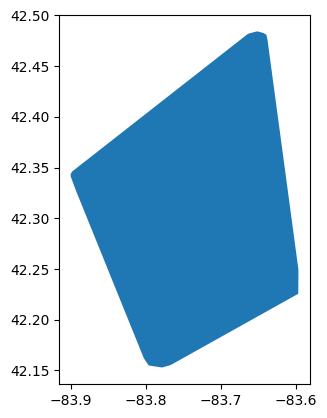

In [ ]:
tessellation = gpd.read_file('limite_geral_tess.gpkg')

tessellation.plot()

In [ ]:
# Converter as colunas com tuplas para formatos exportáveis
# ou remover essas colunas antes da exportação

# 1. Identifique todas as colunas com tuplas
tuple_columns = []
for col in gdf.columns:
    if isinstance(gdf[col].iloc[0], tuple):
        tuple_columns.append(col)

print(f"Colunas com tuplas encontradas: {tuple_columns}")

# 2. Opção 1: Remover as colunas com tuplas
gdf_export = gdf.drop(columns=tuple_columns)

# 3. Opção 2: Converter as tuplas para strings (se precisar manter os dados)
# for col in tuple_columns:
#    gdf[f"{col}_str"] = gdf[col].apply(lambda x: str(x) if x is not None else None)

# 4. Verificar se há outros tipos de dados problemáticos
for col in gdf_export.columns:
    unique_types = set(type(val) for val in gdf_export[col].dropna())
    print(f"Coluna {col}: {unique_types}")

# 5. Tentar exportar com o GeoDataFrame limpo
try:
    gdf_export.to_file('subtrajs_tess.geojson', driver='GeoJSON')
    print("Arquivo exportado com sucesso!")
except Exception as e:
    print(f"Erro ao exportar: {e}")

    # Se ainda houver problemas, tentar uma abordagem mais conservadora
    # Manter apenas colunas com tipos de dados básicos (string, int, float)
    safe_cols = ['geometry', 'origin_tile_ID', 'destination_tile_ID']

    # Adicionar outras colunas básicas que possam existir
    for col in gdf.columns:
        col_type = gdf[col].dtype
        if pd.api.types.is_numeric_dtype(col_type) or pd.api.types.is_string_dtype(col_type):
            if col not in safe_cols and col not in tuple_columns:
                safe_cols.append(col)

    print(f"Tentando exportar apenas colunas seguras: {safe_cols}")
    gdf_export = gdf[safe_cols]
    try:
        gdf_export.to_file('subtrajs_tess99_novo.geojson', driver='GeoJSON')
        print("Arquivo exportado com sucesso usando abordagem conservadora!")
    except Exception as e:
        print(f"Ainda há problemas: {e}")

        # Última tentativa: exportar apenas a geometria e os tile_IDs
        minimal_cols = ['geometry']
        if 'origin_tile_ID' in gdf.columns:
            minimal_cols.append('origin_tile_ID')
        if 'destination_tile_ID' in gdf.columns:
            minimal_cols.append('destination_tile_ID')

        gdf_export = gdf[minimal_cols]
        try:
            gdf_export.to_file('subtrajs_tess_minimal99_30min.geojson', driver='GeoJSON')
            print("Arquivo exportado com colunas mínimas!")
        except Exception as e:
            print(f"Falha final: {e}")

Colunas com tuplas encontradas: ['start_point', 'end_point']
Coluna Trip: {<class 'str'>}
Coluna start_t: {<class 'str'>}
Coluna end_t: {<class 'str'>}
Coluna length: {<class 'float'>}
Coluna direction: {<class 'float'>}
Coluna geometry: {<class 'shapely.geometry.linestring.LineString'>}
Coluna origin_tile_ID: {<class 'str'>}
Coluna destination_tile_ID: {<class 'str'>}
Arquivo exportado com sucesso!


In [ ]:
original.to_file('original_gdf99_novo.gpkg', driver='GPKG')

In [ ]:
chegada.to_file('chegada_gdf99_novo.gpkg', driver='GPKG')

### Fase 4: Extração dos dias da semana

#### A) Para partidas

In [ ]:
import geopandas as gpd
# Instalar pyogrio
# pip install pyogrio

# Usar pyogrio como engine
original = gpd.read_file('original_gdf99_novo.gpkg', engine='pyogrio')

In [ ]:
original

,VehId,Trip,datetime,lon,lat,tile_ID,geometry
0,581,581_subtraj_1,2018-10-20 10:46:34.157820,-83.692538,42.304893,69926,POINT (-83.69254 42.30489)
1,581,581_subtraj_2,2018-10-20 10:53:19.785679,-83.677460,42.309408,76705,POINT (-83.67746 42.30941)
2,581,581_subtraj_3,2018-10-20 11:08:00.498221,-83.704304,42.302994,64463,POINT (-83.70430 42.30299)
3,581,581_subtraj_4,2018-10-20 11:27:24.594611,-83.677297,42.309491,77130,POINT (-83.67730 42.30949)
4,581,581_subtraj_5,2018-10-20 11:44:13.107712,-83.692957,42.304889,69505,POINT (-83.69296 42.30489)
...,...,...,...,...,...,...,...
14493,560,560_subtraj_389,2018-09-16 11:00:48.460099,-83.674250,42.274556,78354,POINT (-83.67425 42.27456)
14494,560,560_subtraj_390,2018-09-16 12:01:33.554282,-83.674177,42.274469,78354,POINT (-83.67418 42.27447)
14495,560,560_subtraj_391,2018-09-16 13:14:51.560450,-83.674040,42.274445,78354,POINT (-83.67404 42.27445)
14496,560,560_subtraj_392,2018-09-16 15:26:49.638516,-83.674123,42.274450,78354,POINT (-83.67412 42.27445)


In [ ]:
chegada = gpd.read_file('chegada_gdf99_novo.gpkg', engine='pyogrio')

chegada

,VehId,Trip,datetime,lon,lat,tile_ID,geometry
0,581,581_subtraj_1,2018-10-20 10:53:14.229133,-83.678060,42.309191,76704,POINT (-83.67806 42.30919)
1,581,581_subtraj_2,2018-10-20 11:07:54.941675,-83.703473,42.302629,64462,POINT (-83.70347 42.30263)
2,581,581_subtraj_3,2018-10-20 11:27:19.038065,-83.678244,42.309001,76704,POINT (-83.67824 42.30900)
3,581,581_subtraj_4,2018-10-20 11:44:07.551166,-83.704162,42.302600,64462,POINT (-83.70416 42.30260)
4,581,581_subtraj_5,2018-10-20 11:52:08.192396,-83.677648,42.309168,76704,POINT (-83.67765 42.30917)
...,...,...,...,...,...,...,...
14493,560,560_subtraj_389,2018-09-16 12:01:27.997736,-83.740791,42.283069,47466,POINT (-83.74079 42.28307)
14494,560,560_subtraj_390,2018-09-16 13:14:46.003904,-83.745824,42.283188,45014,POINT (-83.74582 42.28319)
14495,560,560_subtraj_391,2018-09-16 15:26:44.081970,-83.674871,42.252766,77895,POINT (-83.67487 42.25277)
14496,560,560_subtraj_392,2018-09-16 18:26:40.450869,-83.674783,42.274430,77928,POINT (-83.67478 42.27443)


In [ ]:
import pymove as pm
from pymove.utils import integration as it
from pymove.visualization import folium
import numpy as np
import pandas as pd
from pymove import MoveDataFrame
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

move_df1 = MoveDataFrame(data=original, latitude="lat", longitude="lon", datetime="datetime",
                        traj_id='Trip')

len(move_df1)

14498

In [ ]:
move_df1.generate_tid_based_on_id_datetime()
move_df1.head()

,VehId,id,datetime,lon,lat,tile_ID,geometry,tid
2019,128,128_subtraj_1,2017-11-05 03:12:19.414522,-83.777014,42.274103,31284,POINT (-83.77701 42.27410),128_subtraj_12017110503
2028,128,128_subtraj_10,2017-11-05 10:14:26.151240,-83.682439,42.285142,74545,POINT (-83.68244 42.28514),128_subtraj_102017110510
2029,128,128_subtraj_11,2017-11-05 11:14:10.123418,-83.780208,42.280547,29711,POINT (-83.78021 42.28055),128_subtraj_112017110511
2030,128,128_subtraj_12,2017-11-05 11:31:09.749611,-83.748978,42.277853,43784,POINT (-83.74898 42.27785),128_subtraj_122017110511
2031,128,128_subtraj_13,2017-11-05 12:44:30.534051,-83.787927,42.282863,26204,POINT (-83.78793 42.28286),128_subtraj_132017110512


In [ ]:
move_df1.generate_day_of_the_week_features()

In [ ]:
move_df1.generate_time_of_day_features()

move_df1

,VehId,id,datetime,lon,lat,tile_ID,geometry,tid,day,period
2019,128,128_subtraj_1,2017-11-05 03:12:19.414522,-83.777014,42.274103,31284,POINT (-83.77701 42.27410),128_subtraj_12017110503,Sunday,Early morning
2028,128,128_subtraj_10,2017-11-05 10:14:26.151240,-83.682439,42.285142,74545,POINT (-83.68244 42.28514),128_subtraj_102017110510,Sunday,Morning
2029,128,128_subtraj_11,2017-11-05 11:14:10.123418,-83.780208,42.280547,29711,POINT (-83.78021 42.28055),128_subtraj_112017110511,Sunday,Morning
2030,128,128_subtraj_12,2017-11-05 11:31:09.749611,-83.748978,42.277853,43784,POINT (-83.74898 42.27785),128_subtraj_122017110511,Sunday,Morning
2031,128,128_subtraj_13,2017-11-05 12:44:30.534051,-83.787927,42.282863,26204,POINT (-83.78793 42.28286),128_subtraj_132017110512,Sunday,Afternoon
...,...,...,...,...,...,...,...,...,...,...
2200,603,603_subtraj_95,2018-11-11 04:50:56.950210,-83.801518,42.284850,20542,POINT (-83.80152 42.28485),603_subtraj_952018111104,Sunday,Early morning
2201,603,603_subtraj_96,2018-11-11 06:34:23.612105,-83.801627,42.284986,20542,POINT (-83.80163 42.28499),603_subtraj_962018111106,Sunday,Morning
2202,603,603_subtraj_97,2018-11-11 06:39:09.774224,-83.776643,42.284519,31299,POINT (-83.77664 42.28452),603_subtraj_972018111106,Sunday,Morning
2203,603,603_subtraj_98,2018-11-11 06:47:43.754730,-83.738755,42.229234,48204,POINT (-83.73876 42.22923),603_subtraj_982018111106,Sunday,Morning


In [ ]:
move_df1 = gpd.GeoDataFrame(move_df1, geometry='geometry', crs='EPSG:4326')

move_df1

,VehId,id,datetime,lon,lat,tile_ID,geometry,tid,day,period
2019,128,128_subtraj_1,2017-11-05 03:12:19.414522,-83.777014,42.274103,31284,POINT (-83.77701 42.27410),128_subtraj_12017110503,Sunday,Early morning
2028,128,128_subtraj_10,2017-11-05 10:14:26.151240,-83.682439,42.285142,74545,POINT (-83.68244 42.28514),128_subtraj_102017110510,Sunday,Morning
2029,128,128_subtraj_11,2017-11-05 11:14:10.123418,-83.780208,42.280547,29711,POINT (-83.78021 42.28055),128_subtraj_112017110511,Sunday,Morning
2030,128,128_subtraj_12,2017-11-05 11:31:09.749611,-83.748978,42.277853,43784,POINT (-83.74898 42.27785),128_subtraj_122017110511,Sunday,Morning
2031,128,128_subtraj_13,2017-11-05 12:44:30.534051,-83.787927,42.282863,26204,POINT (-83.78793 42.28286),128_subtraj_132017110512,Sunday,Afternoon
...,...,...,...,...,...,...,...,...,...,...
2200,603,603_subtraj_95,2018-11-11 04:50:56.950210,-83.801518,42.284850,20542,POINT (-83.80152 42.28485),603_subtraj_952018111104,Sunday,Early morning
2201,603,603_subtraj_96,2018-11-11 06:34:23.612105,-83.801627,42.284986,20542,POINT (-83.80163 42.28499),603_subtraj_962018111106,Sunday,Morning
2202,603,603_subtraj_97,2018-11-11 06:39:09.774224,-83.776643,42.284519,31299,POINT (-83.77664 42.28452),603_subtraj_972018111106,Sunday,Morning
2203,603,603_subtraj_98,2018-11-11 06:47:43.754730,-83.738755,42.229234,48204,POINT (-83.73876 42.22923),603_subtraj_982018111106,Sunday,Morning


In [ ]:
move_df1.to_file('partidafinal99_novo.gpkg', driver='GPKG')

#### B) Para chegadas

In [ ]:
import pymove as pm
from pymove.utils import integration as it
from pymove.visualization import folium
import numpy as np
import pandas as pd
from pymove import MoveDataFrame
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

move_df2 = MoveDataFrame(data=chegada, latitude="lat", longitude="lon", datetime="datetime",
                        traj_id='Trip')

len(move_df2)

14498

In [ ]:
move_df2.generate_tid_based_on_id_datetime()
move_df2.head()

,VehId,id,datetime,lon,lat,tile_ID,geometry,tid
2019,128,128_subtraj_1,2017-11-05 04:37:56.441310,-83.680319,42.230665,75312,POINT (-83.68032 42.23067),128_subtraj_12017110504
2028,128,128_subtraj_10,2017-11-05 11:14:04.566872,-83.780762,42.294180,29338,POINT (-83.78076 42.29418),128_subtraj_102017110511
2029,128,128_subtraj_11,2017-11-05 11:31:04.193065,-83.765816,42.263926,36069,POINT (-83.76582 42.26393),128_subtraj_112017110511
2030,128,128_subtraj_12,2017-11-05 12:44:24.977505,-83.780192,42.280284,29711,POINT (-83.78019 42.28028),128_subtraj_122017110512
2031,128,128_subtraj_13,2017-11-05 12:50:37.266088,-83.801190,42.285184,20908,POINT (-83.80119 42.28518),128_subtraj_132017110512


In [ ]:
move_df2.generate_day_of_the_week_features()

In [ ]:
move_df2.generate_time_of_day_features()

move_df2

,VehId,id,datetime,lon,lat,tile_ID,geometry,tid,day,period
2019,128,128_subtraj_1,2017-11-05 04:37:56.441310,-83.680319,42.230665,75312,POINT (-83.68032 42.23067),128_subtraj_12017110504,Sunday,Early morning
2028,128,128_subtraj_10,2017-11-05 11:14:04.566872,-83.780762,42.294180,29338,POINT (-83.78076 42.29418),128_subtraj_102017110511,Sunday,Morning
2029,128,128_subtraj_11,2017-11-05 11:31:04.193065,-83.765816,42.263926,36069,POINT (-83.76582 42.26393),128_subtraj_112017110511,Sunday,Morning
2030,128,128_subtraj_12,2017-11-05 12:44:24.977505,-83.780192,42.280284,29711,POINT (-83.78019 42.28028),128_subtraj_122017110512,Sunday,Afternoon
2031,128,128_subtraj_13,2017-11-05 12:50:37.266088,-83.801190,42.285184,20908,POINT (-83.80119 42.28518),128_subtraj_132017110512,Sunday,Afternoon
...,...,...,...,...,...,...,...,...,...,...
2200,603,603_subtraj_95,2018-11-11 06:34:18.055559,-83.771285,42.243419,33628,POINT (-83.77129 42.24342),603_subtraj_952018111106,Sunday,Morning
2201,603,603_subtraj_96,2018-11-11 06:39:04.217678,-83.788831,42.282967,25818,POINT (-83.78883 42.28297),603_subtraj_962018111106,Sunday,Morning
2202,603,603_subtraj_97,2018-11-11 06:47:38.198184,-83.752016,42.281506,42163,POINT (-83.75202 42.28151),603_subtraj_972018111106,Sunday,Morning
2203,603,603_subtraj_98,2018-11-11 06:55:36.061141,-83.739141,42.240790,48221,POINT (-83.73914 42.24079),603_subtraj_982018111106,Sunday,Morning


In [ ]:
move_df2 = gpd.GeoDataFrame(move_df2, geometry='geometry', crs='EPSG:4326')

move_df2

,VehId,id,datetime,lon,lat,tile_ID,geometry,tid,day,period
2019,128,128_subtraj_1,2017-11-05 04:37:56.441310,-83.680319,42.230665,75312,POINT (-83.68032 42.23067),128_subtraj_12017110504,Sunday,Early morning
2028,128,128_subtraj_10,2017-11-05 11:14:04.566872,-83.780762,42.294180,29338,POINT (-83.78076 42.29418),128_subtraj_102017110511,Sunday,Morning
2029,128,128_subtraj_11,2017-11-05 11:31:04.193065,-83.765816,42.263926,36069,POINT (-83.76582 42.26393),128_subtraj_112017110511,Sunday,Morning
2030,128,128_subtraj_12,2017-11-05 12:44:24.977505,-83.780192,42.280284,29711,POINT (-83.78019 42.28028),128_subtraj_122017110512,Sunday,Afternoon
2031,128,128_subtraj_13,2017-11-05 12:50:37.266088,-83.801190,42.285184,20908,POINT (-83.80119 42.28518),128_subtraj_132017110512,Sunday,Afternoon
...,...,...,...,...,...,...,...,...,...,...
2200,603,603_subtraj_95,2018-11-11 06:34:18.055559,-83.771285,42.243419,33628,POINT (-83.77129 42.24342),603_subtraj_952018111106,Sunday,Morning
2201,603,603_subtraj_96,2018-11-11 06:39:04.217678,-83.788831,42.282967,25818,POINT (-83.78883 42.28297),603_subtraj_962018111106,Sunday,Morning
2202,603,603_subtraj_97,2018-11-11 06:47:38.198184,-83.752016,42.281506,42163,POINT (-83.75202 42.28151),603_subtraj_972018111106,Sunday,Morning
2203,603,603_subtraj_98,2018-11-11 06:55:36.061141,-83.739141,42.240790,48221,POINT (-83.73914 42.24079),603_subtraj_982018111106,Sunday,Morning


In [ ]:
move_df2.to_file('chegadafinal99_novo.gpkg', driver='GPKG')